In [104]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
# with h5py.File('/home/dz2336/Desktop/Research/Project/hdp/data/real/Achilles_10252013_eeg_theta_1.mat','r') as f:
#     tlfp = (f['TLFP'][()]);
#     tph = f['Tph'][()];

with h5py.File('D:/Pose/Neuro Code/data/NoveltySessInfoMatFiles/Achilles_10252013_sessInfo.mat', 'r') as f:
    ## load spike info
    spikes_times = np.array(f['sessInfo']['Spikes']['SpikeTimes'])[0];
    spikes_cells = np.array(f['sessInfo']['Spikes']['SpikeIDs'])[0];
    pyr_cells = np.array(f['sessInfo']['Spikes']['PyrIDs'])[0];
    
    ## load location info ## all in maze
    locations_2d = np.array(f['sessInfo']['Position']['TwoDLocation']).T;
    locations = np.array(f['sessInfo']['Position']['OneDLocation'])[0];
    locations_times = np.array(f['sessInfo']['Position']['TimeStamps'])[:,0];
    # linspeed_raw = np.array(f['sessInfo']['Position']['linspeed_raw'])[0];
    # linspeed_sm = np.array(f['sessInfo']['Position']['linspeed_sm'])[0];
    
    ## load maze epoch range
    maze_epoch = np.array(f['sessInfo']['Epochs']['MazeEpoch'])[:,0];
    wake_epoch = np.array(f['sessInfo']['Epochs']['Wake']);
    
time_in_maze = ((spikes_times >= maze_epoch[0])*(spikes_times <= maze_epoch[1]));

spikes_times = spikes_times[time_in_maze];
spikes_cells = spikes_cells[time_in_maze];

cell_mask = np.isin(spikes_cells, pyr_cells);
spikes_times = spikes_times[cell_mask];
spikes_cells = spikes_cells[cell_mask];

bin_size = 25; ## change bin size to whatever you want here

binned_spike_times = np.array(np.floor(spikes_times*1000/bin_size), dtype='int');
spike_by_neuron = np.zeros((binned_spike_times.max() - binned_spike_times.min()+1, pyr_cells.shape[0]));

cell_dic = {};
for i,v in enumerate(pyr_cells):
    cell_dic[int(v)] = i;
    
for it in range(binned_spike_times.shape[0]):
    spike_by_neuron[binned_spike_times[it]-binned_spike_times.min(), cell_dic[spikes_cells[it]]] += 1;
    
# tph_binned_time = np.array(np.floor((np.arange(binned_spike_times.min(),binned_spike_times.max()+1)*bin_size/1000)*1250), dtype='int');
# tph_vec = tph[0][tph_binned_time]
# tlpf_vec = tlfp[0][tph_binned_time]

In [103]:
for t in range(len(spikes_times)-1): 
    if spikes_times[t+1] - spikes_times[t] < 0:
        print('ERROR')

In [94]:
binned_spike_times.max() - binned_spike_times.min()

82699

In [95]:
spike_by_neuron[0][:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [96]:
maze_epoch

array([18079.5, 20147. ])

In [97]:
spikes_times.min(), spikes_times.max(), spikes_times.max() - spikes_times.min()

(18079.5065, 20146.99595, 2067.489450000001)

In [83]:
spike_by_neuron.shape, spike_by_neuron.shape[0]*25/1000

((82700, 120), 2067.5)

In [84]:
locations_times.shape, locations_times[0], locations_times[-1], locations_times[-1] - locations_times[0], 

((80762,), 18079.5, 20146.97440008915, 2067.4744000891515)

In [85]:
locations.shape, locations[0], locations[-1], locations[-1] - locations[0], 

((80762,), nan, nan, nan)

In [86]:
np.floor(locations_times[0] * 1000 / 25), np.floor(locations_times[1] * 1000 / 25), 

(723180.0, 723181.0)

In [ ]:
### MAIN 
binned_locations_times = np.array(np.floor(locations_times*1000/bin_size), dtype='int');
print(binned_locations_times.max() - binned_locations_times.min()+1)
print(binned_locations_times.shape)
print(locations_times.shape)
print(locations.shape)

# non_na = (~np.isnan(linspeed_raw));
non_na = (~np.isnan(locations));

print(non_na.shape)

locations = locations[non_na];
binned_locations_times = binned_locations_times[non_na];
# linspeed_raw = linspeed_raw[non_na];
# linspeed_sm = linspeed_sm[non_na];
# locations_2d = locations_2d[non_na];
locations.shape, binned_locations_times.shape

82698
(80762,)
(80762,)
(80762,)
(80762,)


((10336,), (10336,))

In [88]:
## MAIN 

locations_vec = np.zeros(spike_by_neuron.shape[0])+np.nan;
# linspeed_vec = np.zeros(spike_by_neuron.shape[0])+np.nan;

print(binned_spike_times.min())
for it in range(len(binned_locations_times)):
    locations_vec[binned_locations_times[it] - binned_spike_times.min()] = locations[it];
    if it < 10:
        print(binned_locations_times[it], binned_locations_times[it] - binned_spike_times.min(), locations[it])
    # linspeed_vec[binned_locations_times[it] - binned_spike_times.min()] = linspeed_raw[it];

locations_vec.shape, locations_vec[0], locations_vec[1], locations_vec[4462]

723180
727637 4457 0.005800072934626944
727638 4458 0.011089204010523457
727639 4459 0.014781732145069068
727640 4460 0.014778307061892579
727641 4461 0.014487174991890945
727642 4462 0.014327908624184177
727643 4463 0.01127679855114322
727644 4464 0.00698881307807142
727645 4465 0.004790875281505789
727646 4466 0.007299015863284463


((82700,), nan, nan, 0.014327908624184177)

In [99]:
## MAIN 
print(spike_by_neuron.shape)
spike_by_neuron_use = spike_by_neuron[~np.isnan(locations_vec)]; # this removes the spikes that correspond to a time which location is not recorded
print(spike_by_neuron_use.shape)
locations_vec = locations_vec[~np.isnan(locations_vec)];
# tph_vec = tph_vec[~np.isnan(linspeed_vec)]
# tlpf_vec = tlpf_vec[~np.isnan(linspeed_vec)]
# linspeed_vec = linspeed_vec[~np.isnan(linspeed_vec)];



(82700, 120)
(10336, 120)


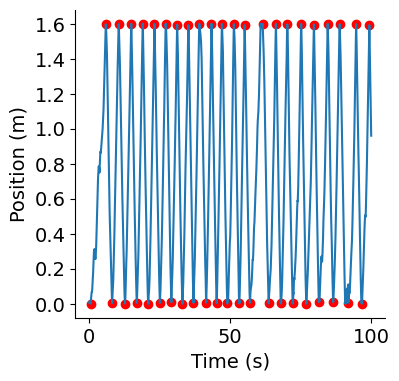

In [100]:

def rolling_max(x):
    idx_split = [];
    for idx, val in enumerate(x):
        if val < 0.025 or val > 1.575:
            tmp = x[max(idx-20,0):min(idx+20,len(x))];
            if val == min(tmp) or val==max(tmp):
                idx_split.append(idx)
    idx_split = np.array(idx_split)
    return idx_split

idx_split = rolling_max(locations_vec)
idx_split = np.delete(idx_split, np.where(np.abs(np.diff(locations_vec[idx_split])) < 1)[0])

from matplotlib.ticker import FormatStrFormatter
## check if you have removed all the stop stages

fig = plt.figure(figsize=(4,4))
ax1 = plt.subplot(111);
fsz = 14;
ll = 4000
plt.plot(locations_vec[:ll])
ax1.set_xlabel('Time (s)',fontsize=fsz,fontweight='normal');
ax1.set_ylabel('Position (m)',fontsize=fsz,fontweight='normal');
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.setp(ax1.get_xticklabels(), fontsize=fsz);
plt.setp(ax1.get_yticklabels(), fontsize=fsz);
ax1.set_xticks((0,2000,4000,6000));
ax1.set_xticklabels((0,50,100,150));
#ax1.set_xticks((0,2000,4000,6000,8000,10000))
#ax1.set_xticklabels((0,50,100,150,200,250))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.scatter(idx_split[idx_split<ll], locations_vec[idx_split[idx_split<ll]], c='red')

# ## save data
# sio.savemat("../data/achilles_data/Achilles_data.mat",
#             {'trial':idx_split, 'spikes':spike_by_neuron_use, 'loc':locations_vec, 'lfp':tlpf_vec})
